# Regression Decision Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [2]:
# simulate train data
X_train, y_train = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)

In [3]:
# simulate test data
X_test, y_test = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)

In [4]:
tree = DecisionTreeClassifier(max_depth=2)

In [5]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [6]:
np.mean(tree.predict(X_test) == y_test)

0.8656716417910447

In [7]:
tree.predict_proba(X_test)

array([[0.        , 0.        , 1.        ],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.18421053, 0.81578947, 0.        ],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.

[Text(0.5, 0.8333333333333334, 'x[1] <= -3.768\ngini = 0.667\nsamples = 201\nvalue = [67, 67, 67]'),
 Text(0.25, 0.5, 'x[0] <= 4.273\ngini = 0.065\nsamples = 59\nvalue = [0, 2, 57]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 57\nvalue = [0, 0, 57]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.5, 'x[0] <= -1.105\ngini = 0.563\nsamples = 142\nvalue = [67, 65, 10]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.33\nsamples = 66\nvalue = [53, 3, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.301\nsamples = 76\nvalue = [14, 62, 0]')]

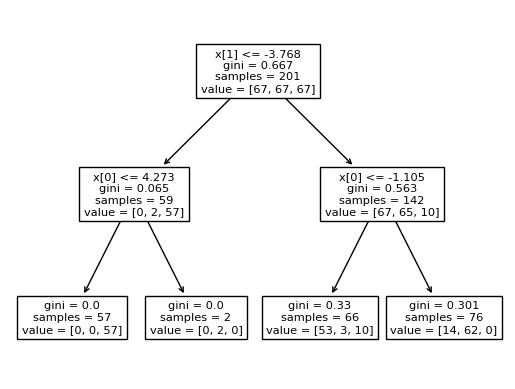

In [8]:
plot_tree(tree)

## Effects of Scaling

In [9]:
# simulate train data with feature variables on very different scales
X_train, y_train = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)
X_train[:, 1] = X_train[:, 1] * 20

In [10]:
# simulate test data with feature variables on very different scales
X_test, y_test = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)
X_test[:, 1] = X_test[:, 1] * 20

In [11]:
# create scaler and transform both train and test X data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [12]:
# create tree and knn models
tree = DecisionTreeClassifier(max_depth=10)
knn = KNeighborsClassifier()

In [13]:
# scaling has an effect on knn!
knn.fit(X_train, y_train)
print(knn.predict(X_test[:25, :]))
knn.fit(X_train_transformed, y_train)
print(knn.predict(X_test_transformed[:25, :]))

[2 0 0 1 0 1 1 2 2 0 1 0 0 1 2 0 2 2 2 2 1 1 1 1 0]
[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]


In [14]:
# scaling has no effect on knn!
tree.fit(X_train, y_train)
print(tree.predict(X_test[:25, :]))
tree.fit(X_train_transformed, y_train)
print(tree.predict(X_test_transformed[:25, :]))

[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]
[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]
